# Midterm Exam Winter 2022

This midterm exam is an open-book, open-resource exam. However, you may not collaborate with anyone. Please send clarification questions and hint requests to me at [adrian.liu2@mcgill.ca](mailto:adrian.liu2@mcgill.ca). Submission instructions are below. The exam is due at 11:59:59 Eastern on February 24th, 2022.

You may copy and paste code from your previous assignments, but __you must cite your sources__. E.g., if you want to use a function that you wrote in Coding Lab 02, please include the comment "this function was copied from Coding Lab 02"

**There will be a few points available in questions 4 and 6 for good coding habits. For example, if there is a bit of code that you intend to reuse, define a function rather than copying and pasting it multiple times!**

## Question 1

I have created a ``git`` repo here: https://github.com/acliu/PHYS321_Midterm2022.git. In this repo there is an old ``git`` commit with the commit message "movie quote commit here". In that commit is a file called ``movie_quote.txt`` (which no longer exists in the current commit), and inside the file is a quote from a movie:
1. Retrieve this quote and write it down below.
2. Write down the ``git`` commands you used to clone the repo and the commands you used to help you retrieve the quote.

There are multiple ways to do this using ``git``. I am not picky about how you do this, as long as 1) you used the command line, and 2) it isn't "I went to the Github website and looked there".

Ans.
> git clone https://github.com/acliu/PHYS321_Midterm2022.git

> cd .\PHYS321_Midterm2022\

> git log 

> git checkout 2711b6a83fd68629ce605a263b58040d861ae118

> .\movie_quote.txt

May the Force be with you

## Question 2

Create a **new** repo on the ``github`` website and clone it. Do an initial commit of this Jupyter notebook locally on your command line and commit with the message "first commit of midterm". Do this now (because I will be looking for a commit in your history prior to your final submission). Push to your repo. Write down all the commands that you used on the command line to do this.

Ans.
> git clone https://github.com/WillPugs/Phys321_midterm.git

> cd .\Phys321_midterm\

> git add Midterm2022.ipynb

> git status

> git commit -m 'first commit of midterm'

> git push origin main

## Question 3

Note that although the answers to 3(a) and 3(c) can be found by Googling, to get full credit you will need to show how you can get the answer using code. 

__a)__ A few years ago people thought that the star Betelgeuse could go supernova. Where is Betelgeuse (in RA and DEC)?

In [154]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [155]:
#use sesame name resolver to find Betelgeuse's reference
betelgeuse_center = SkyCoord.from_name('alf Ori	')
betelgeuse_center.ra

<Longitude 88.79293899 deg>

In [156]:
betelgeuse_center.dec

<Latitude 7.407064 deg>

__b)__ Is Betelgeuse viewable from all parts of the northern hemisphere? Is it viewable from all parts of the southern hemisphere?

Ans. Betelgeuse is viewable from all parts of the northern hemisphere as it has a positive declination. This star can be seen from parts of the southern hemisphere, up to latidtudes of dec - $90^\circ\approx -82.6^\circ$.

__c)__ Suppose Betelgeuse were to go supernova during March break. For roughly how many hours every night will it be in principle observable? (Assume that we have a telescope that can be see horizon-to-horizon, and neglect the fact that Sun can affect astronomical observations even when it is slightly below the horizon

In [157]:
#setup copied from coding lab 1
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time

from astropy.visualization import quantity_support, time_support
quantity_support()
time_support()
from matplotlib import pyplot as plt

McGill = EarthLocation(lat='45d30.29m', lon='-73d34.63m')

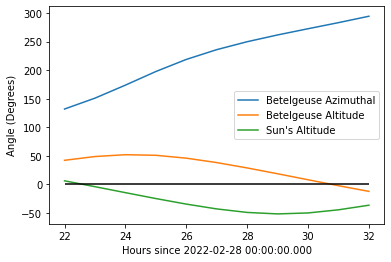

In [158]:
#new code
observing_time = Time('2022-02-28') #march break starts on the Monday 26 of Feb

t = range(22, 33) #look over two days to get a better picture
times = [observing_time + i*u.hour for i in t]
frames = [AltAz(location=McGill, obstime=time) for time in times]

star_pos = [betelgeuse_center.transform_to(ref) for ref in frames]
Suns = [get_sun(time).transform_to(AltAz(location=McGill, obstime=time)) for time in times]

plt.figure()
plt.plot([i for i in t], [y.az.deg for y in star_pos], label="Betelgeuse Azimuthal")
plt.plot([i for i in t], [y.alt.deg for y in star_pos], label="Betelgeuse Altitude")
plt.plot([i for i in t], [s.alt.deg for s in Suns], label="Sun's Altitude")

plt.hlines(0, min(t), max(t), 'k')

plt.legend()
plt.xlabel(f"Hours since {observing_time}")
plt.ylabel("Angle (Degrees)")
plt.show()

Ans. We need Sun's altitude to be below the horizon and Betelgeuse's to be above. this corresponds roughly to the range 23 hours - 31 hours. During March break there are around eight hours a day where Betelgeuse is observable from Montreal.

## Question 4

Let's compare the Hubble Space Telescope (HST) to the recently launched (and soon operational!) James Webb Space Telescope (JWST).

__a)__ First we'll compare the sensitivity of these telescopes. HST is said to have a "limiting magnitude" $+31.5$ while JWST's is $+34$. Which telescope can see fainter things? By what factor? (In reality this is not an entirely fair comparison because HST and JWST observe at different wavelengths and are good at different types of science).

Ans. JWST can see fainter objects. Plugging this into

$\frac{F_2}{F_1}=100^{\frac{m_1-m_2}{5}}$

gives 0.1. JSWT can see object emitting one tenth as mush flux as HST can.

__b)__ Produce the following plots:
* The minimum luminosity of an object (expressed in absolute magnitudes) that can be seen by HST and JWST as a function of redshift $z$
* The same plots but with the luminosity expressed in units of the Solar luminosity $L_\odot$
* The previous two plots but as a function of distance rather than redshift.

Have your plots span $0 < z < 10$, and make sure the plots are visually easy to read. (Marks will be deducted if, for example, the trends cannot be easily seen because of inappropriate axis ranges).

In [159]:
from astropy.cosmology import Planck15
import numpy as np

C:\Users\willp\Anaconda3\lib\site-packages\astropy\cosmology\flrw.py:1280: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


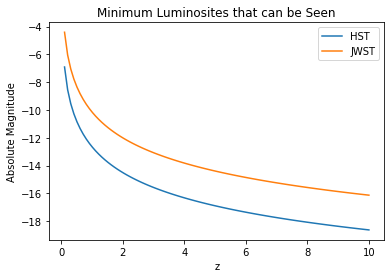

In [160]:
def abs_mag(z, apparent, solar=False):
    """ (float, float, boolean) -> (float)
    absolute mag = apparent mag - dist_mod 
    z: redshift
    solar: whether or not the answer should be reported in solar units
    Assume Planck15 cosmology
    """
    if solar:
        power = 0.4*((apparent-Planck15.distmod(z).value)-4.74)
        return 10**power
    return apparent-Planck15.distmod(z).value

redshifts = np.linspace(0, 10, 100)
abs_HST = abs_mag(redshifts, 31.5)
abs_JWST = abs_mag(redshifts, 34)

plt.figure()
plt.plot(redshifts, abs_HST, label='HST')
plt.plot(redshifts, abs_JWST, label='JWST')

plt.title('Minimum Luminosites that can be Seen')
plt.xlabel('z')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

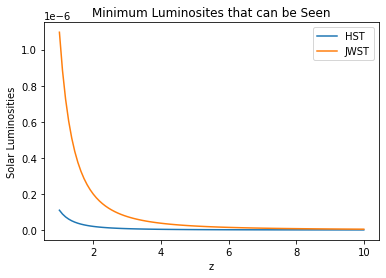

In [161]:
#change range for plot visibility 
redshifts = np.linspace(1, 10, 100)
abs_HST = abs_mag(redshifts, 31.5, True)
abs_JWST = abs_mag(redshifts, 34, True)

plt.figure()
plt.plot(redshifts, abs_HST, label='HST')
plt.plot(redshifts, abs_JWST, label='JWST')

plt.title('Minimum Luminosites that can be Seen')
plt.xlabel('z')
plt.ylabel('Solar Luminosities')
plt.legend()
plt.show()

C:\Users\willp\Anaconda3\lib\site-packages\astropy\cosmology\flrw.py:1280: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


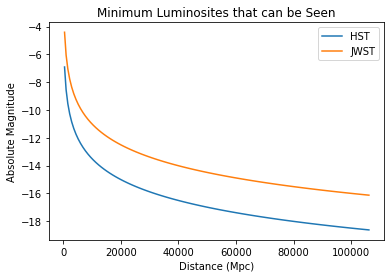

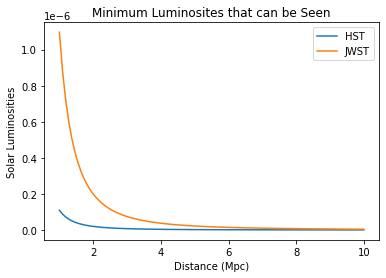

In [171]:
redshifts = np.linspace(0, 10, 100)
x = Planck15.luminosity_distance(redshifts).value
abs_HST = abs_mag(redshifts, 31.5)
abs_JWST = abs_mag(redshifts, 34)

plt.figure()
plt.plot(x, abs_HST, label='HST')
plt.plot(x, abs_JWST, label='JWST')

plt.title('Minimum Luminosites that can be Seen')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

#change range for plot visibility 
redshifts = np.linspace(1, 10, 100)
x = Planck15.luminosity_distance(redshifts).value
abs_HST = abs_mag(redshifts, 31.5, True)
abs_JWST = abs_mag(redshifts, 34, True)

plt.figure()
plt.plot(redshifts, abs_HST, label='HST')
plt.plot(redshifts, abs_JWST, label='JWST')

plt.title('Minimum Luminosites that can be Seen')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Solar Luminosities')
plt.legend()
plt.show()

There is a slight (but visible) difference in the shapes of the graphs at smaller redshifts/distances. At higher values the relationship between redshift and luminosity distance becomes nearly linear. 

__c)__ Suppose we lived in a (fake) universe that contained only three types of galaxies, each of which have an exact well-defined luminosity:
* Type A galaxies that have luminosity $L = 10^{8}L_\odot$. These galaxies have a number density of $10^{-2}$ per comoving Mpc$^{3}$.
* Type B galaxies that have luminosity $L = 10^{10}L_\odot$. These galaxies have a number density of $5 \times 10^{-2}$ per comoving Mpc$^{3}$.
* Type C galaxies that have luminosity $L = 10^{12}L_\odot$. These galaxies have a number density of $10^{-3}$ per comoving Mpc$^{3}$.

Now imagine (completely unrealistically) that we get to use HST and JWST to perform a galaxy survey over the entire sky. How many of each galaxy type should I expect to find?

In [180]:
#step 1, find max distane at which a type of galaxy is visible
#step 2, find the volume of the universe this visible distance corresponds to
#step 3, mulitply by density

def get_abs(L):
    """ (float) -> (float)
    Finds the apparent magnitude of an object with luminosity L in solar luminosities.
    """
    return np.log10(L)/-0.4 + 4.74

def get_dist(L, apparent):
    """ (float) -> (float)
    Finds the max distance that an object of luminosity L in solar luminosites can be seen.
    apprent: max apparent magnitude observable.
    """
    temp = 10*u.pc*np.sqrt(100**((apparent-get_abs(L))/5))
    return temp.to(u.Mpc).value

def sphere_volume(r):
    return 4*np.pi*r**3/3

def num_obj(L, apparent, density):
    """ (float, float, float) -> (float)
    L: luminosity of object in solar luminosites
    apparent: max apparent observable magnitude
    density: density of objects in the universe
    """
    return density*sphere_volume(get_dist(L, apparent))

print('HST')
print(f"Type A Galaxies: {num_obj(10**8, 31.5, 10**-2)}")
print(f"Type B Galaxies: {num_obj(10**10, 31.5, 5*10**-2)}")
print(f"Type C Galaxies: {num_obj(10**12, 31.5, 10**-3)}")

print('JWST')
print(f"Type A Galaxies: {num_obj(10**8, 34, 10**-2)}")
print(f"Type B Galaxies: {num_obj(10**10, 34, 5*10**-2)}")
print(f"Type C Galaxies: {num_obj(10**12, 34, 10**-3)}")

HST
Type A Galaxies: 476528203155.49243
Type B Galaxies: 2382641015777462.0
Type C Galaxies: 4.765282031554926e+16
JWST
Type A Galaxies: 15069144912787.934
Type B Galaxies: 7.534572456393963e+16
Type C Galaxies: 1.5069144912787935e+18


## Question 5

Note that this question is designed to be a little bit more open-ended than the others. You will need to explain your answer **in addition** to performing some simple calculations.

I am interested in designing a spam filter that decides if an email is suspicious or not by looking for various key words. Would the word "free" be a good one to use? Support your answer with a calculation. Feel free to collect some data from your own inbox! If the word "free" is an effective one to use, what would be an example of an ineffective word? And why would it be ineffective? If you decide that "free" is ineffective, give an example of a better choice. In both cases, explain why. (Ideally with some numerical examples).

In [164]:
## Your answer here

## Question 6

Tony and Stephen are selling cakes on rue Sherbrooke. Their boss, Carol, has noticed that the number of cakes they sell per hour is well-modelled by a Poisson distribution. That is, if $n$ is a random variable signifying the number of cakes sold in an hour, the probability distribution $p(n)$ is given by

\begin{equation}
p(n) = \frac{e^{-\lambda} \lambda^n}{n!}
\end{equation}

Carol has noticed, however, that the mean number of cakes sold per hour is different for her two salespeople. In other words, $\lambda_\textrm{tony} \neq \lambda_\textrm{stephen}$. Through years of observations, she has determined that $\lambda_\textrm{tony} = 5$ and $\lambda_\textrm{stephen} = 8$.

Today, Stephen worked for 6 hours and claimed that he sold $6$, $6$, $8$, $8$, $6$, $8$ cakes (each number represents the number of cakes sold in an hour). These numbers are kinda low for Stephen, so Carol confronts him and asks him if Tony had secretly substituted for him. Stephen objects. He says that there are always random fluctuations, and that he'll really need to see a rigorous statistical analysis.

Carol turns to you for help, asking you to use your Bayesian inference skills to help her out. Can you help her? Do you think Tony substituted for Stephen? How confident are you in your conclusion?

In [165]:
## Your answer here

## Ungraded question

I would like to tailor the last third of the course to your interests, as well as to get your overall feedback on things. Please fill out [this](https://forms.gle/Sy4Lf6QVdYdUA23a6) anonymous survey to help me with that. This is not a graded part of your midterm, but now is just a convenient time to do it.

## Submission

You're done! Do a final git commit, taking care to include everything relevant (e.g., if you created a new ``tools.py`` file, be sure to include it). If you decide to revise your answers before the deadline, no problem---just make the changes you want to make and resubmit your work. Push your work to your repo, and send me an invitation to the repo (my Github username is acliu)